# MNIST Classification

🎯 <b><u>Exercise objectives</u></b>
- Understand the *MNIST* dataset 
- Design your first **Convolutional Neural Network** (*CNN*) and answer questions such as:
    - what are *Convolutional Layers*? 
    - how many *parameters* are involved in such a layer?
- Train this CNN on images

🚀 <b><u>Let's get started!</u></b>

Imagine that we are  back in time into the 90's.
You work at a *Post Office* and you have to deal with an enormous amount of letters on a daily basis. How could you automate the process of reading the ZIP Codes, which are a combination of 5 handwritten digits? 

This task, called the **Handwriting Recognition**, used to be a very complex problem back in those days. It was solved by *Bell Labs* (among others) where one of the Deep Learning gurus, [*Yann Le Cun*](https://en.wikipedia.org/wiki/Yann_LeCun), used to work.

From [Wikipedia](https://en.wikipedia.org/wiki/Handwriting_recognition):

> Handwriting recognition (HWR), also known as Handwritten Text Recognition (HTR), is the ability of a computer to receive and interpret intelligible handwritten input from sources such as paper documents, photographs, touch-screens and other devices

![Number recognition](recognition.gif)

*Note: The animation above is just here to help you visualize what happens with the different images: <br/> $\rightarrow$ For each image, once the CNN is trained, it will predict what digit is written. The inputs are the different digits and not one animation/video!*

🤔 <b><u>How does this CNN work ?</u></b>

- *Inputs*: Images (_each image shows a handwritten digit_)
- *Target*: For each image, you want your CNN model to predict the correct digit (between 0 and 9)
    - It is a **multi-class classification** task (more precisely a 10-class classification task since there are 10 different digits).

🔢 To improve the capacity of the Convolutional Neural Network to read these numbers, we need to feed it with many images representing handwritten digits. This is why the 📚 [**MNIST dataset**](http://yann.lecun.com/exdb/mnist/) *(Mixed National Institute of Standards and Technology)* was created.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## (1) The `MNIST` Dataset

📚 Tensorflow/Keras offers multiple [**datasets**](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) to play with:
- *Vectors*: `boston_housing` (regression)
- *Images* : `mnist`, `fashion_mnist`, `cifar10`, `cifar100` (classification)
- *Texts*: `imbd`, `reuters` (classification/sentiment analysis)


💾 You can **load the MNIST dataset** with the following commands:

In [16]:
from tensorflow.keras import datasets


# Loading the MNIST Dataset...
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

# The train set contains 60 000 images, each of them of size 28x28
# The test set contains 10 000 images, each of them of size 28x28
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

### (1.1) Exploring the dataset

❓ **Question: Let's have look at some handwritten digits of this MNIST dataset.** ❓

🖨 Print some images from the *train set*.

<details>
    <summary><i>Hints</i></summary>

💡*Hint*: use the `imshow` function from `matplotlib` with `cmap = "gray"`

🤨 Note: if you don't specify this *cmap* argument, the weirdly displayed colors are just Matplotlib defaults...
    
</details>

In [17]:
number_of_train_images = len(X_train)
number_of_images_to_show = 3

random_list_of_images_to_show = np.random.randint(0, number_of_train_images, number_of_images_to_show)

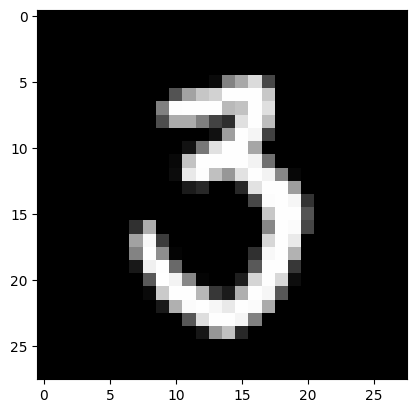

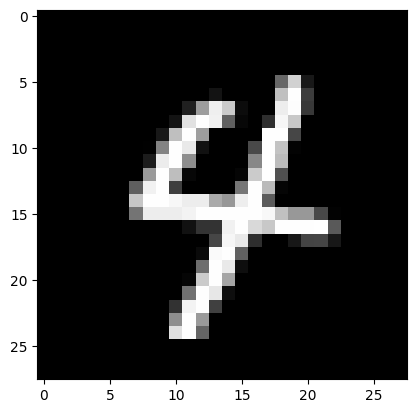

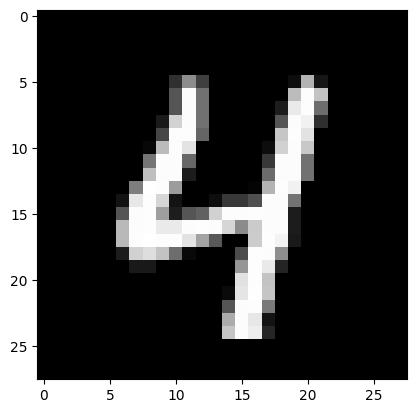

In [18]:
for i in random_list_of_images_to_show:
    plt.imshow(X_train[i], cmap='gray')
    plt.show()

### (1.2) Image Preprocessing

❗️ **Neural Networks converge faster when the input data is somehow normalized** ❗️

👩🏻‍🏫 How do we proceed for Convolutional Neural Networks ?
* The `RBG` intensities are coded between 0 and 255. 
* We can simply divide the input data by the maximal value 255 to have all the pixels' intensities between 0 and 1 😉

❓ **Question ❓ As a first preprocessing step, please normalize your data.** 

Don't forget to do it both on your train data and your test data.

(*Note: you can also center your data, by subtracting 0.5 from all the values, but it is not mandatory*)

In [19]:
X_train.shape

(60000, 28, 28)

In [20]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
X_train.shape

(60000, 28, 28)

### (1.3) Inputs' dimensionality

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


👆 Remember that you have 60,000 training images and 10,000 test images, each of size $(28, 28)$. However...

> ❗️  **`Convolutional Neural Network models need to be fed with images whose last dimension is the number of channels`.**  

> 🧑🏻‍🏫 The shape of tensors fed into ***ConvNets*** is the following: `(NUMBER_OF_IMAGES, HEIGHT, WIDTH, CHANNELS)`

🕵🏻This last dimension is clearly missing here. Can you guess the reason why?
<br>
<details>
    <summary><i>Answer<i></summary>
        
* All these $60000$ $ (28 \times 28) $ pictures are black-and-white $ \implies $ Each pixel lives on a spectrum from full black (0) to full white (1).
        
    * Theoretically, you don't need to know the number of channels for a black-and-white picture since there is only 1 channel (the "whiteness" of "blackness" of a pixel). However, it is still mandatory for the model to have this number of channels explicitly stated.
        
    * In comparison, colored pictures need multiple channels:
        - the RGB system with 3 channels (<b><span style="color:red">Red</span> <span style="color:green">Green</span> <span style="color:blue">Blue</span></b>)
        - the CYMK system  with 4 channels (<b><span style="color:cyan">Cyan</span> <span style="color:magenta">Magenta</span> <span style="color:yellow">Yellow</span> <span style="color:black">Black</span></b>)
        
        
</details>        

❓ **Question: expanding dimensions** ❓

* Use the **`expand_dims`** to add one dimension at the end of the training data and test data.

* Then, print the shapes of `X_train` and `X_test`. They should respectively be equal to $(60000, 28, 28, 1)$ and $(10000, 28, 28, 1)$.

In [23]:
from tensorflow.keras.backend import expand_dims

In [24]:
X_train = expand_dims(X_train, axis=-1)
X_test = expand_dims(X_test, axis=-1)

In [25]:
X_train.shape

TensorShape([60000, 28, 28, 1])

### (1.4) Target encoding

One more thing to for a multiclass classification task in Deep Leaning:

👉 _"one-hot-encode" the categories*_

❓ **Question: encoding the labels** ❓ 

* Use **`to_categorical`** to transform your labels. 
* Store the results into two variables that you can call **`y_train_cat`** and **`y_test_cat`**.

In [26]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [27]:
# Quick check that you correctly used to_categorical
assert(y_train_cat.shape == (60000,10))
assert(y_test_cat.shape == (10000,10))

In [28]:
y_test_cat.shape

(10000, 10)

The data is now ready to be used. ✅

## (2) The Convolutional Neural Network

### (2.1) Architecture and compilation of a CNN


❓ **Question: CNN Architecture and compilation** ❓

Now, let's build a <u>Convolutional Neural Network</u> that has: 


- a `Conv2D` layer with 8 filters, each of size $(4, 4)$, an input shape suitable for your task, the `relu` activation function, and `padding='same'`
- a `MaxPool2D` layer with a `pool_size` equal to $(2, 2)$
- a second `Conv2D` layer with 16 filters, each of size $(3, 3)$, and the `relu` activation function
- a second `MaxPool2D` layer with a `pool_size` equal to $(2, 2)$


- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the `relu` activation function
- a last (predictive) layer that is suited for your task

In the function that initializes this model, do not forget to include the <u>compilation of the model</u>, which:
* optimizes the `categorical_crossentropy` loss function,
* with the `adam` optimizer, 
* and the `accuracy` as the metrics

(*Note: you could add more classification metrics if you want but the dataset is well balanced!*)

In [29]:
X_train.shape

TensorShape([60000, 28, 28, 1])

In [30]:
from tensorflow.keras import layers
from tensorflow.keras import models


def initialize_model():

    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(28,28,1), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))
    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(10, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])
    
    return model

❓ **Question: number of trainable parameters in a convolutional layer** ❓ 

How many trainable parameters are there in your model?
1. Compute them with ***model.summary( )*** first
2. Recompute them manually to make sure you properly understood ***what influences the number of weights in a CNN***.

In [31]:
model = initialize_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         136       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7

In [40]:
# First Conv2D
first_layer_weights = 8 * (4*4) * 1 + 8
first_layer_weights

136

In [41]:
# Second Conv2D
second_layer_weights = 16 * (3*3) * 8 + 16
second_layer_weights

1168

In [42]:
# Third Conv2D
third_layer_weights = 10 * 7 * 7 * 16 + 10
third_layer_weights

7850

In [43]:
# Dense Layer
dense_layer_weights = 10 * 10 + 10
dense_layer_weights

110

In [44]:
total_number_of_weights = first_layer_weights + second_layer_weights + third_layer_weights + dense_layer_weights
total_number_of_weights

9264

### (2.2) Training a CNN

❓ **Question: training a CNN** ❓ 

Initialize your model and fit it on the train data. 
- Do not forget to use a **Validation Set/Split** and an **Early Stopping criterion**. 
- Limit yourself to 5 epochs max in this challenge, just to save some precious time for the more advanced challenges!

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()

es = EarlyStopping(patience=3)

history = model.fit(X_train, y_train_cat,
                   validation_split=0.3,
                   batch_size=16,
                   epochs=5,
                   callbacks=[es],
                   verbose=1)

Epoch 1/5
2625/2625 [==============================] - 22s 8ms/step - loss: 0.3060 - accuracy: 0.9052 - val_loss: 0.1174 - val_accuracy: 0.9632
Epoch 2/5
2625/2625 [==============================] - 21s 8ms/step - loss: 0.1072 - accuracy: 0.9677 - val_loss: 0.0921 - val_accuracy: 0.9712
Epoch 3/5
2625/2625 [==============================] - 21s 8ms/step - loss: 0.0794 - accuracy: 0.9761 - val_loss: 0.0839 - val_accuracy: 0.9760
Epoch 4/5
2625/2625 [==============================] - 21s 8ms/step - loss: 0.0627 - accuracy: 0.9809 - val_loss: 0.0767 - val_accuracy: 0.9771
Epoch 5/5
2625/2625 [==============================] - 22s 8ms/step - loss: 0.0514 - accuracy: 0.9841 - val_loss: 0.0750 - val_accuracy: 0.9768


❓ **Question: How many iterations does the CNN perform per epoch** ❓

_Note: it has nothing to do with the fact that this is a CNN. This is related to the concept of forward/backward propagation already covered during the previous lecture on optimizers, fitting, and losses 😉_

> YOUR ANSWER HERE

<details>
    <summary><i>Answer</i></summary>

With `verbose = 1` when fitting your model, you have access to crucial information about your training procedure.
    
Remember that we've just trained our CNN model on $60000$ training images

If the chosen batch size is 32: 

* For each epoch, we have $ \large \lceil \frac{60000}{32} \rceil = 1875$ minibatches <br/>
* The _validation_split_ is equal to $0.3$ - which means that within one single epoch, there are:
    * $ \lceil 1875 \times (1 - 0.3) \rceil = \lceil 1312.5 \rceil = 1313$ batches are used to compute the `train_loss` 
    * $ 1875 - 1312 = 562 $ batches are used to compute the `val_loss`
    * **The parameters are updated 1313 times per epoch** as there are 1313 forward/backward propagations per epoch !!!


👉 With so many updates of the weights within one epoch, you can understand why this CNN model converges even with a limited number of epochs.

</details>    


### (2.3) Evaluating its performance

❓ **Question: Evaluating your CNN** ❓ 

What is your **`accuracy on the test set?`**

In [32]:
y_test

<tf.Tensor: shape=(10000, 28, 28, 1), dtype=float64, numpy=
array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
  

In [37]:
y_test.shape

(10000,)

In [48]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0635 - accuracy: 0.9802


[0.06352439522743225, 0.9801999926567078]

🎉 You should already be impressed by your CNN skills! Reaching over 95% accuracy!

🔥 You solved what was a very hard problem 30 years ago with your own CNN.

🏁 **Congratulations!**

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!